[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1O2XwPwYgk3ohZOqcVXDdCE7V4v72AI4q#scrollTo=vmL7HqnPomKF)

## Kaggle.com -> House Prices - Advanced Regression Techniques

1. [Loading data](#0)
2. [Viewing data](#1)
3. [Data preprocessing](#2)
4. [Model Training and prediction](#3)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4, suppress=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### <a name='0'></a> 1. Loading data

In [2]:
train_raw = pd.read_csv('./data/train.csv')
test_raw = pd.read_csv('./data/test.csv')

In [3]:
# copying of original data
train = train_raw.copy()
test = test_raw.copy()


### <a name='1'></a> 2. Viewing data

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print(f'the shape of the train set: {train.shape}')
print(f'the shape of the test set: {test.shape}')

the shape of the train set: (1460, 81)
the shape of the test set: (1459, 80)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Some statistics for numerical columns

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Some statistics for object columns

In [10]:
train.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
# column 'Id' in train is useless so it is deleted 
train.drop(['Id'], axis=1, inplace=True)
# column 'Id' in test is cut and assign to new variable to use it in submission 
# a file
test_id = test.pop('Id')

print(f'Now with no "Id" the shape of the train set: {train.shape}')
print(f'Now with no "Id" the shape of the test set: {test.shape}')

Now with no "Id" the shape of the train set: (1460, 80)
Now with no "Id" the shape of the test set: (1459, 79)


### <a name='2'></a> 3. Data preprocessing

#### Correlation with SalesPrice

In [12]:
corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Correlation heatmap

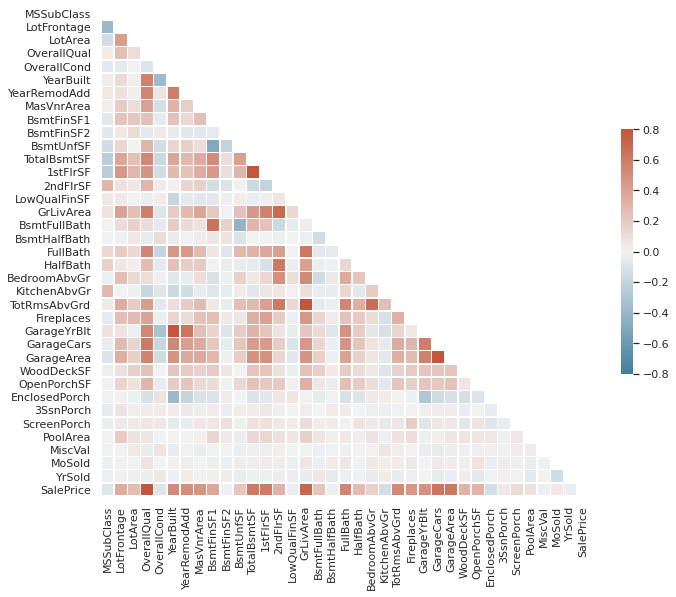

In [13]:
sns.set(style='white')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0, vmin=-.8, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

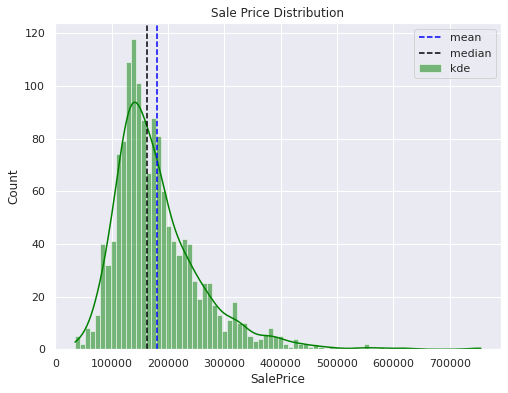

In [15]:
sns.set(palette='colorblind')
plt.figure(figsize=(8,6))
sns.histplot(train["SalePrice"], bins=80, kde=True, color='green', label="kde").set_title('Sale Price Distribution')
plt.axvline(x = train['SalePrice'].mean(), color='blue', linestyle ="--", label="mean")
plt.axvline(x = train['SalePrice'].median(), color='black', linestyle ="--", label="median")
plt.legend(loc='upper right')

plt.show()

#### Outliers detection of target variable

In [16]:
# the value of the variable on the border of the first and second quartiles
q1 = train['SalePrice'].quantile(0.25)

# variable values on the border of the third and fourth quartiles
q3 = train['SalePrice'].quantile(0.75)

# iqr (interquartile range) = third quartile - first quartile 
iqr = q3 - q1
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)

# number of outliers under low boundary
num_of_outliers_low = (train['SalePrice'] < low_boundary).sum()
# number of outliers over upp boundary
num_of_outliers_upp = (train['SalePrice'] > upp_boundary).sum()

print(f'The number of outliers are {num_of_outliers_low + num_of_outliers_upp} \
which is {(num_of_outliers_low + num_of_outliers_upp)/train.shape[0]:.4%} of \
all Sales Price values.\nOutliers are under low boundary: {low_boundary} and \
over upp boundary: {upp_boundary}')

The number of outliers are 61 which is 4.1781% of all Sales Price values.
Outliers are under low boundary: 3937.5 and over upp boundary: 340037.5


We can use the logarithm function from NumPy library which helps in  outliers detection and get normal distribution

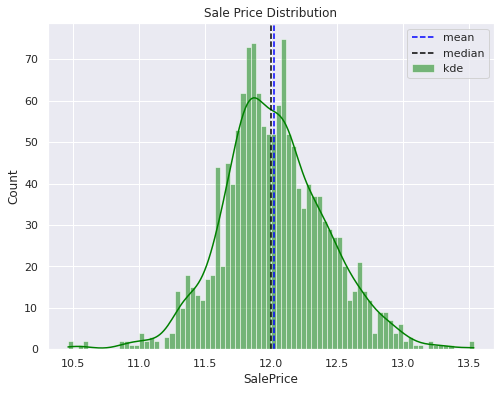

In [17]:
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.figure(figsize=(8,6))
sns.histplot(train["SalePrice"], bins=80, kde=True, color='green', label="kde").set_title('Sale Price Distribution')
plt.axvline(x = train['SalePrice'].mean(), color='blue', linestyle ="--", label="mean")
plt.axvline(x = train['SalePrice'].median(), color='black', linestyle ="--", label="median")
plt.legend(loc='upper right')

plt.show()

In [18]:
train[train['SalePrice'] > 340037.5].sum().sum()

0.0

In [19]:
np.expm1(train['SalePrice']).value_counts().sort_values()

307000.0     1
265000.0     1
293077.0     1
185750.0     1
142953.0     1
            ..
110000.0    13
145000.0    14
155000.0    14
135000.0    17
140000.0    20
Name: SalePrice, Length: 663, dtype: int64

#### Concatenate train and test sets to one DataFrame


In [20]:
y_train = train.pop('SalePrice')
df = pd.concat([train, test])
print(f"concatenated train and test set size is : {df.shape}")
ntrain = train.shape[0]
print(ntrain)
ntest = test.shape[0]
print(ntest)



concatenated train and test set size is : (2919, 79)
1460
1459


#### Categorical column distribution

Although columns 'MSSubClass', 'OverallQual', 'OverallCond' are marked as numeric, they are actually categorical because they contain classes or categories. So they get converted to object.

- MSSubClass: Identifies the type of dwelling involved in the sale:	
      value   meaning
      ---------------
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

- OverallQual: Rates the overall material and finish of the house:
      value   meaning
      ---------------
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

- OverallCond: Rates the overall condition of the house:
      value   meaning
      ---------------
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [21]:
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['OverallQual'] = df['OverallQual'].apply(str)
df['OverallCond'] = df['OverallCond'].apply(str)

All category column in df

In [22]:
cat_col = [col for col in df.select_dtypes(include=['O']).columns]
print(df[cat_col].columns)
print(f'\nIn df there are {len(df[cat_col].columns)} categorical columns')

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In df there are 46 categorical columns



In column MSSubClass there are 16 unique values: 
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64


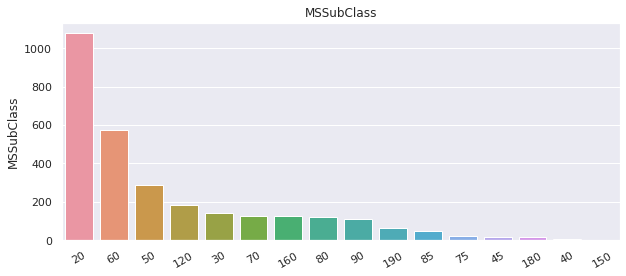


In column MSZoning there are 5 unique values: 
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


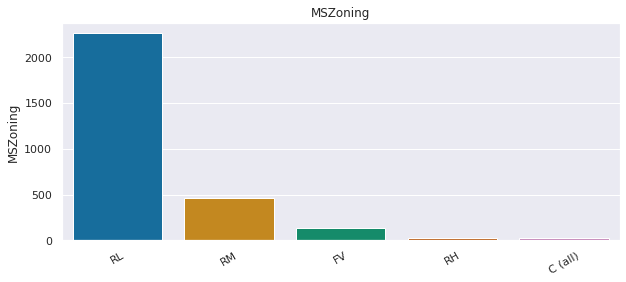


In column Street there are 2 unique values: 
Pave    2907
Grvl      12
Name: Street, dtype: int64


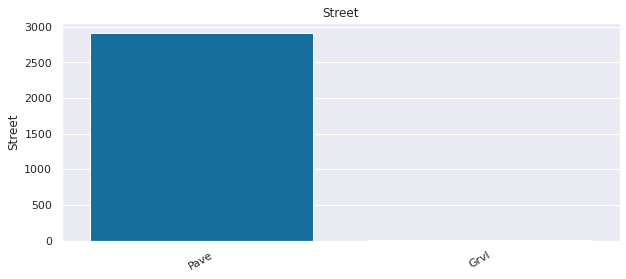


In column Alley there are 2 unique values: 
Grvl    120
Pave     78
Name: Alley, dtype: int64


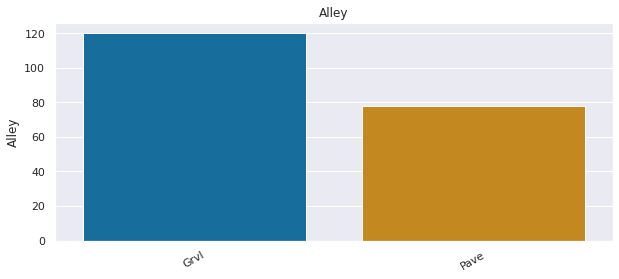


In column LotShape there are 4 unique values: 
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64


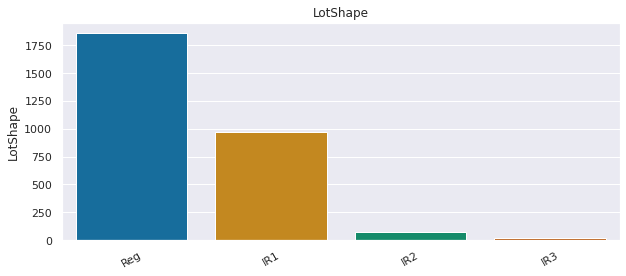


In column LandContour there are 4 unique values: 
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64


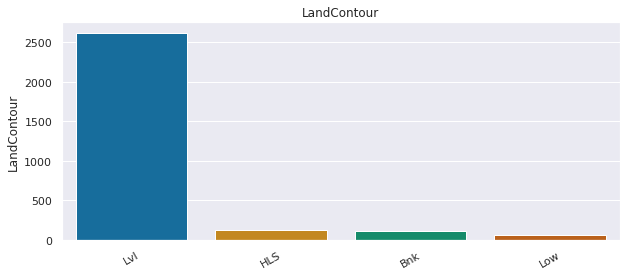


In column Utilities there are 2 unique values: 
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


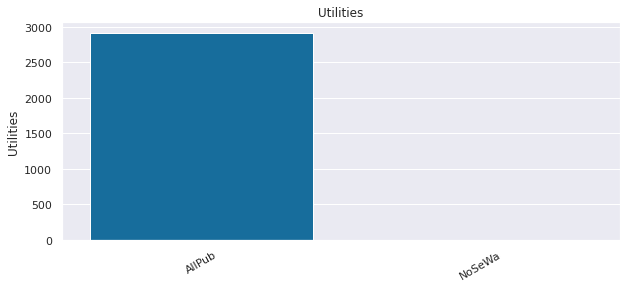


In column LotConfig there are 5 unique values: 
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64


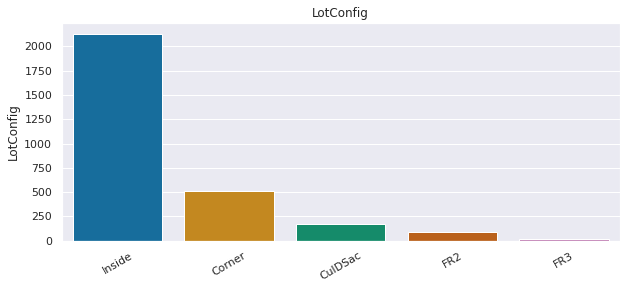


In column LandSlope there are 3 unique values: 
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64


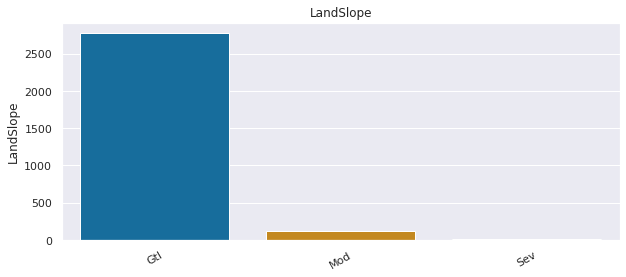


In column Neighborhood there are 25 unique values: 
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64


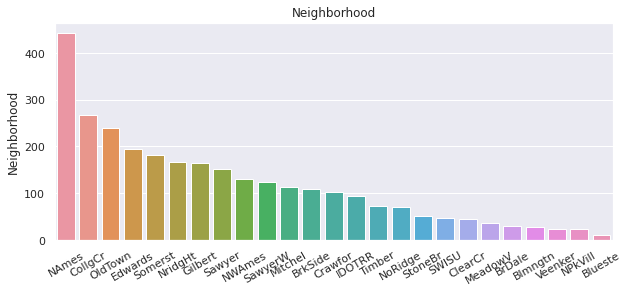


In column Condition1 there are 9 unique values: 
Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64


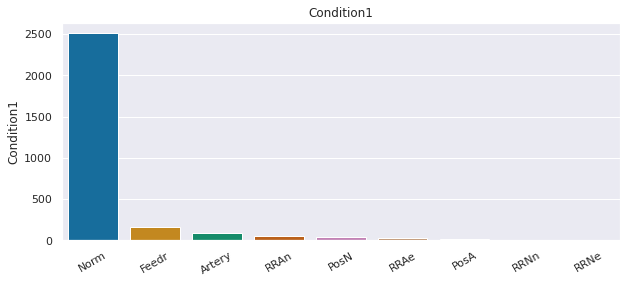


In column Condition2 there are 8 unique values: 
Norm      2889
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


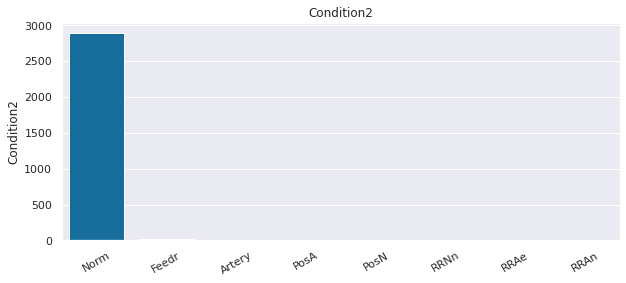


In column BldgType there are 5 unique values: 
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64


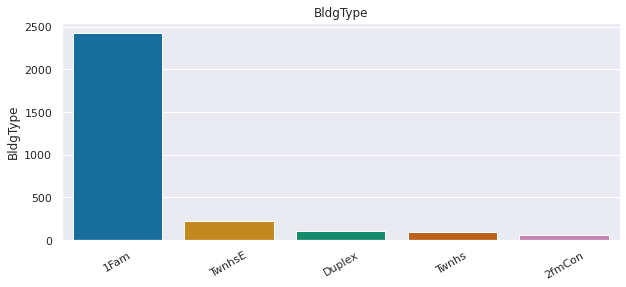


In column HouseStyle there are 8 unique values: 
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64


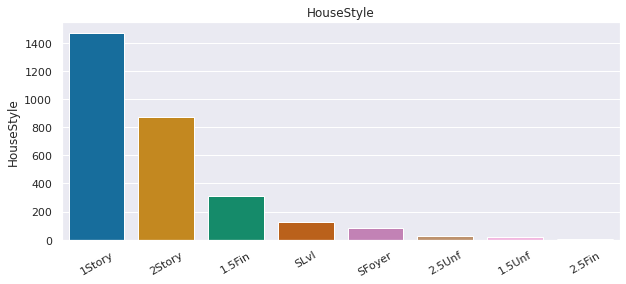


In column OverallQual there are 10 unique values: 
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64


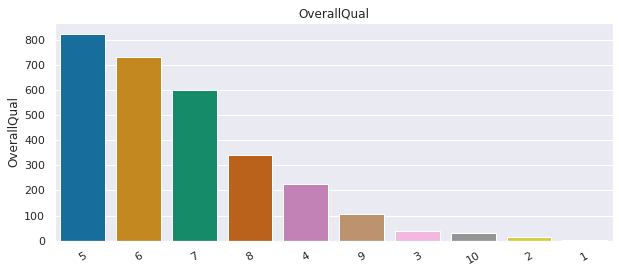


In column OverallCond there are 9 unique values: 
5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64


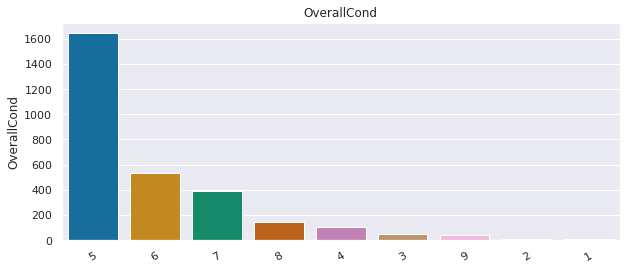


In column RoofStyle there are 6 unique values: 
Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64


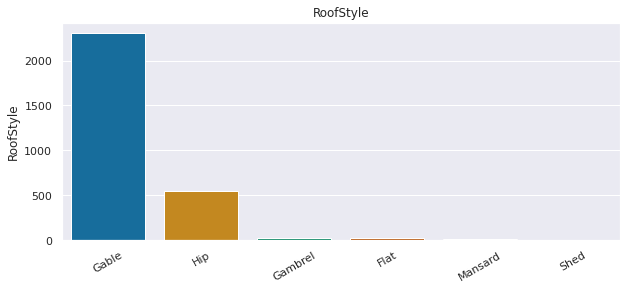


In column RoofMatl there are 8 unique values: 
CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64


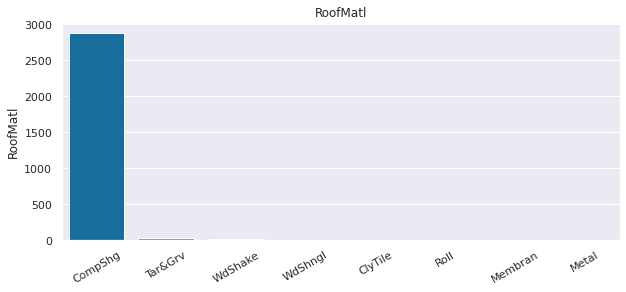


In column Exterior1st there are 15 unique values: 
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64


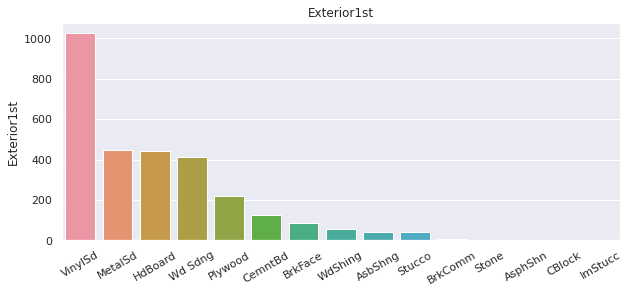


In column Exterior2nd there are 16 unique values: 
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


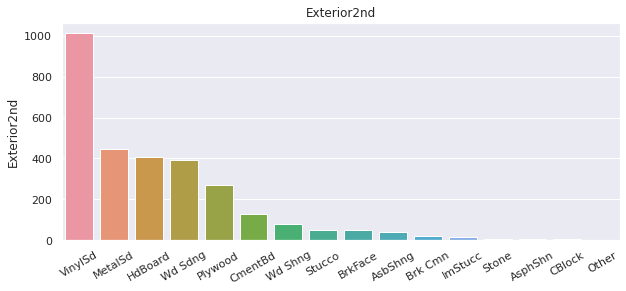


In column MasVnrType there are 4 unique values: 
None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64


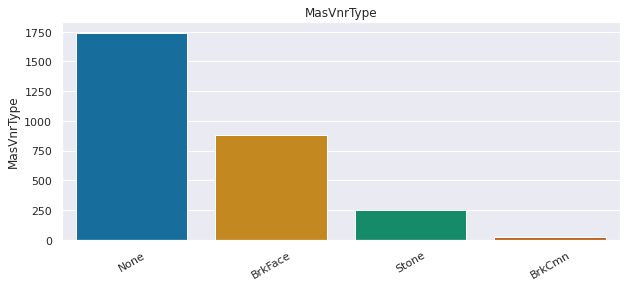


In column ExterQual there are 4 unique values: 
TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64


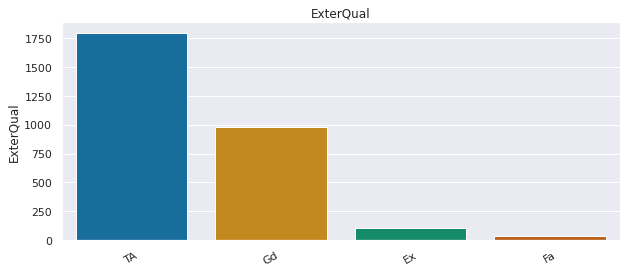


In column ExterCond there are 5 unique values: 
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64


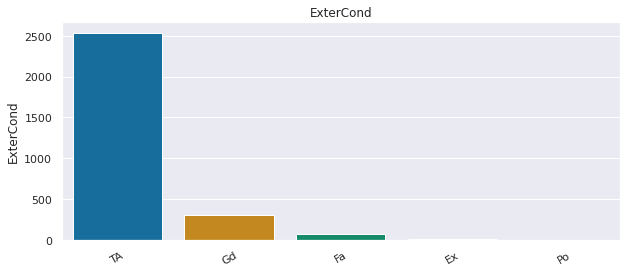


In column Foundation there are 6 unique values: 
PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64


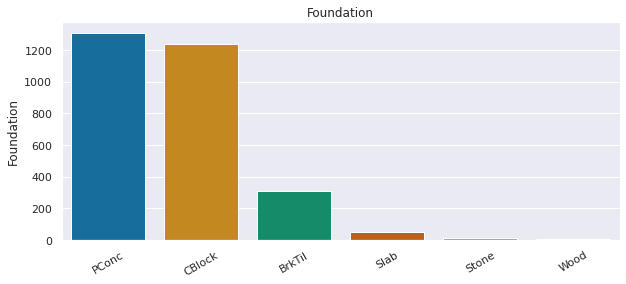


In column BsmtQual there are 4 unique values: 
TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64


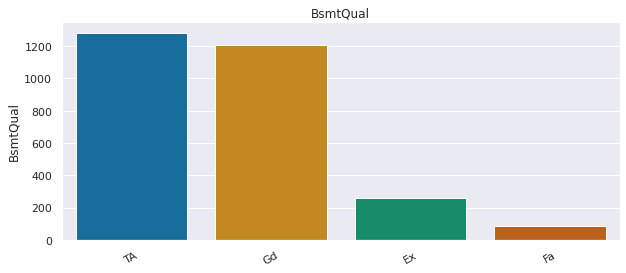


In column BsmtCond there are 4 unique values: 
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64


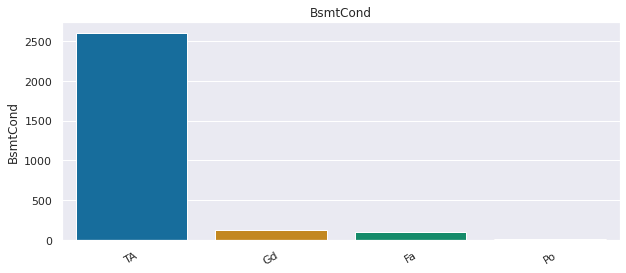


In column BsmtExposure there are 4 unique values: 
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64


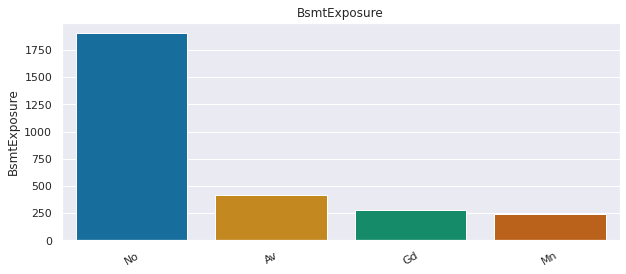


In column BsmtFinType1 there are 6 unique values: 
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64


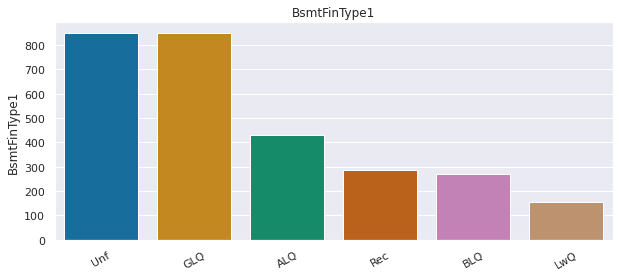


In column BsmtFinType2 there are 6 unique values: 
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


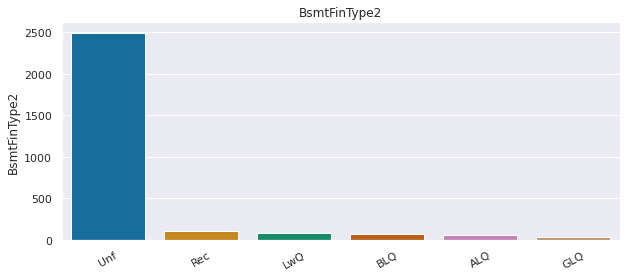


In column Heating there are 6 unique values: 
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64


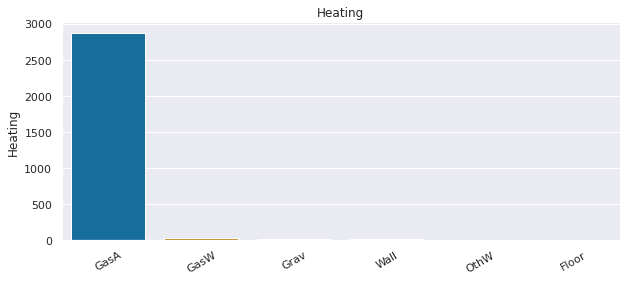


In column HeatingQC there are 5 unique values: 
Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64


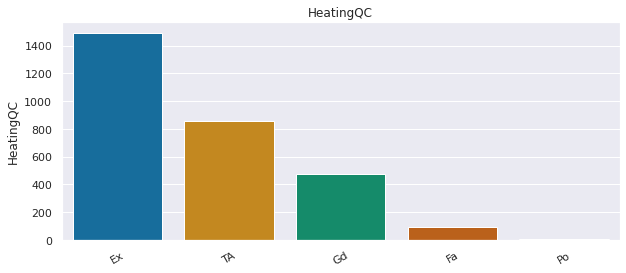


In column CentralAir there are 2 unique values: 
Y    2723
N     196
Name: CentralAir, dtype: int64


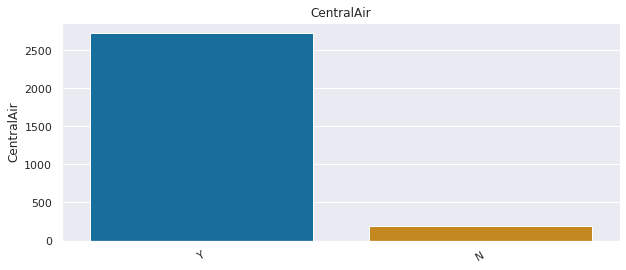


In column Electrical there are 5 unique values: 
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64


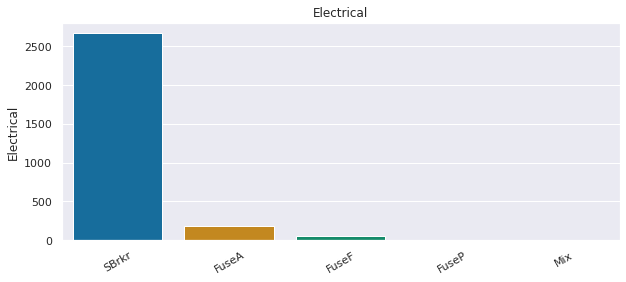


In column KitchenQual there are 4 unique values: 
TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64


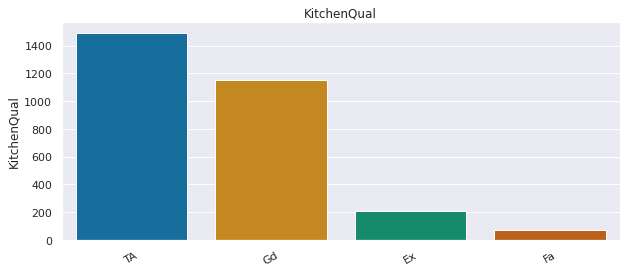


In column Functional there are 7 unique values: 
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


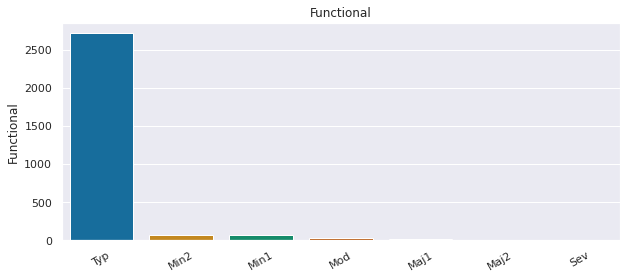


In column FireplaceQu there are 5 unique values: 
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64


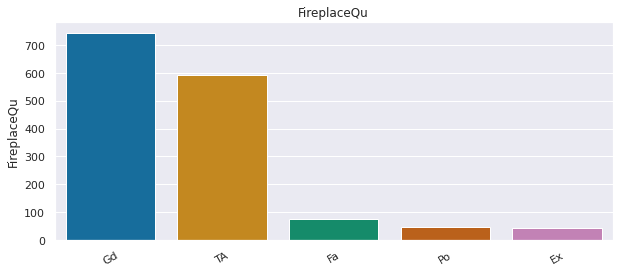


In column GarageType there are 6 unique values: 
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64


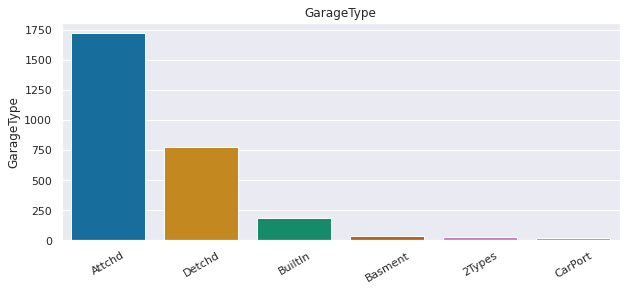


In column GarageFinish there are 3 unique values: 
Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64


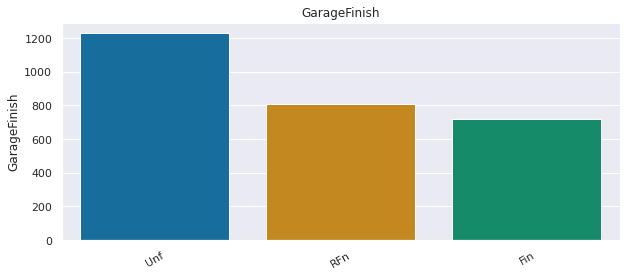


In column GarageQual there are 5 unique values: 
TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64


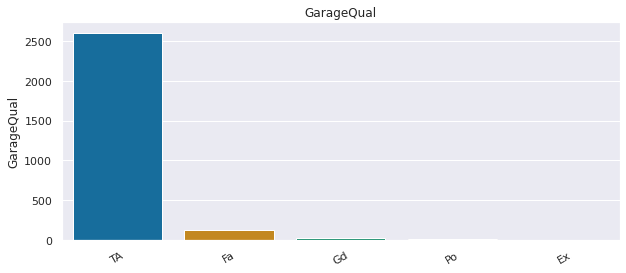


In column GarageCond there are 5 unique values: 
TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64


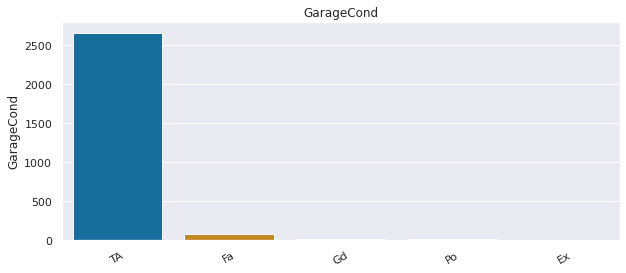


In column PavedDrive there are 3 unique values: 
Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64


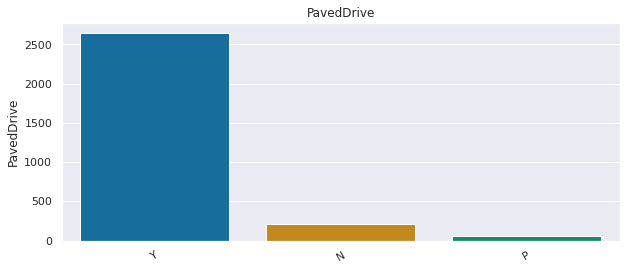


In column PoolQC there are 3 unique values: 
Gd    4
Ex    4
Fa    2
Name: PoolQC, dtype: int64


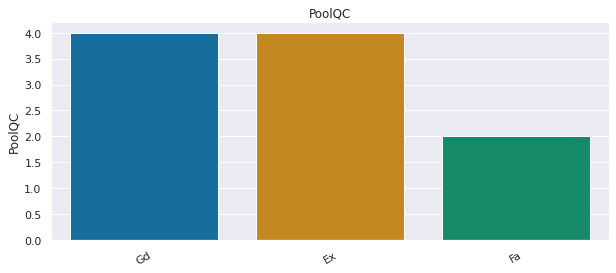


In column Fence there are 4 unique values: 
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64


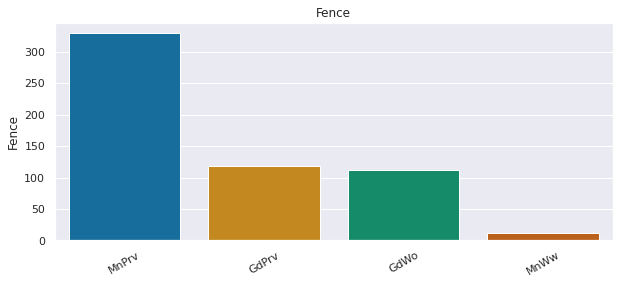


In column MiscFeature there are 4 unique values: 
Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64


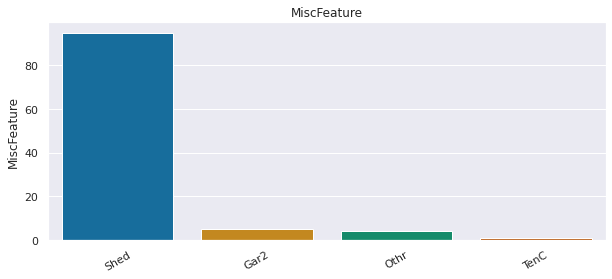


In column SaleType there are 9 unique values: 
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


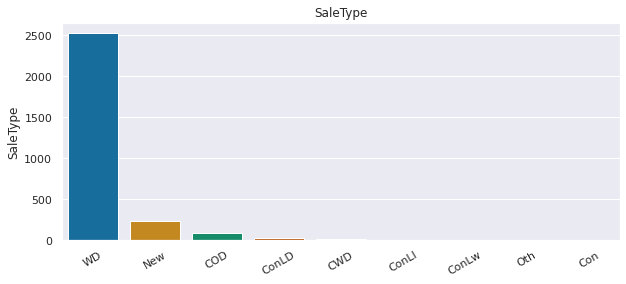


In column SaleCondition there are 6 unique values: 
Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64


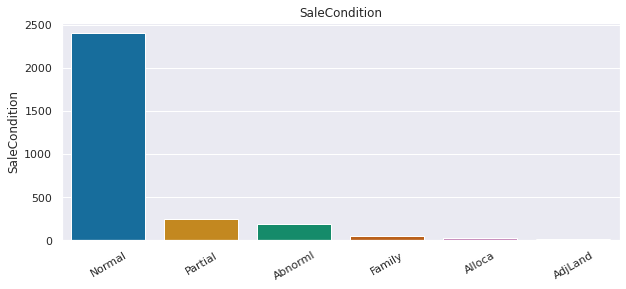

In [23]:
sns.set(palette='colorblind')
for col in df.select_dtypes(include=['O']).columns:
    print(f"\nIn column {col} there are {df[col].nunique()} unique values: \n{df[col].value_counts()}")
    plt.figure(figsize=(10,4))
    sns.barplot(x=df[col].value_counts().index,
               y=df[col].value_counts()).set_title(col)
    plt.xticks(rotation=30)
    plt.show()

Column Utilities is useless because there in almost all cases is one category:
- AllPub    2916
- NoSeWa       1

this column is deleted from df


In [24]:
df.drop('Utilities', axis=1, inplace=True)
cat_col.remove('Utilities')

df.columns[df.columns == 'Utilities'].any()

False

#### Numerical column distribution

All numerical column in df

In [25]:
num_col = [col for col in df.select_dtypes(include=['float', 'int']).columns]
print(df[num_col].columns)
print(f'\nIn df there are {len(df[num_col].columns)} numerical columns')

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In df there are 33 numerical columns


In [26]:
for col in df.select_dtypes(include=['float', 'int']).columns:
    print(f"\nIn column {col} there are {df[col].nunique()} unique values: \n{df[col].value_counts()}")
    


In column LotFrontage there are 128 unique values: 
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
182.0      1
119.0      1
195.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64

In column LotArea there are 1951 unique values: 
9600     44
7200     43
6000     34
9000     29
10800    25
         ..
12867     1
2628      1
8775      1
13478     1
12292     1
Name: LotArea, Length: 1951, dtype: int64

In column YearBuilt there are 118 unique values: 
2005    142
2006    138
2007    109
2004     99
2003     88
       ... 
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Length: 118, dtype: int64

In column YearRemodAdd there are 61 unique values: 
1950    361
2006    202
2007    164
2005    141
2004    111
       ... 
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int64

In column MasVnrArea there are 444 unique values: 
0.0      1738
120.0      15

In [27]:
# Adding total square footage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# adding also this column name to list of numerical name of columns
num_col.append('TotalSF')

In [28]:
print(df.shape)
print(df.columns)
print(num_col)

(2919, 79)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Wood

#### Missing values

In [29]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
TotalSF            1
Length: 79, dtype: int64

In [30]:
# missing data in percent and total
df_nulls = df.isnull().sum().sort_values(ascending=False)

df_percentage = (df.isnull().sum() * 100 / len(df))

df_not_nulls = df.notnull().sum().sort_values(ascending=True)

df_missing_values = pd.concat([df_not_nulls, df_nulls, df_percentage], 
                              axis=1, 
                              keys=["Total_not_nulls","Total_nulls","Nulls_percentage"])

In [31]:
df_missing_values.head(34)

,Total_not_nulls,Total_nulls,Nulls_percentage
PoolQC,10,2909,99.657417
MiscFeature,105,2814,96.402878
Alley,198,2721,93.216855
Fence,571,2348,80.438506
FireplaceQu,1499,1420,48.646797
LotFrontage,2433,486,16.649538
GarageYrBlt,2760,159,5.447071
GarageQual,2760,159,5.447071
GarageFinish,2760,159,5.447071
GarageCond,2760,159,5.447071


Missing values in categorical columns

In [32]:
df[cat_col].isnull().sum().sort_values(ascending=False).head(12)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
dtype: int64

For most categorical columns missing value means that the house does not have that feature e.g. pool, basement or fence. That is why all nulls can be replaced by 'None' that is a significant value and not missing value except from the folowing which shouldn't be None and they are repleced by the the most frequent category:
- Functional: Home functionality rating - 'Typ'
- Electrical: Electrical system - 'SBrkr'
- KitchenQual: Kitchen quality - 'TA'
- SaleType: Type of sale - 'WD'
- MSZoning: The general zoning classification - 'RL'
- Exterior1st: Exterior covering on house - 'VinylSd'

In [33]:
temp = ['Functional','Electrical','KitchenQual','SaleType','MSZoning','Exterior1st']

for col in df[cat_col][df[cat_col].isnull()]:
    
    if col not in temp:
        df[col].fillna("None", inplace=True)

df['Functional'].fillna('Typ' ,inplace=True)
df['Electrical'].fillna('SBrkr' ,inplace=True) 
df['KitchenQual'].fillna('TA' ,inplace=True) 
df['SaleType'].fillna('WD' ,inplace=True) 
df['MSZoning'].fillna('RL' ,inplace=True) 
df['Exterior1st'].fillna('VinylSd' ,inplace=True)  
        
# checking if there are still null values in categorical columns
df[cat_col].isnull().sum().sum()

0

Missing values in numerical columns

In [34]:
df[num_col].isnull().sum().sort_values(ascending=False).head(12)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
TotalSF           1
GarageArea        1
dtype: int64

GarageQual = None means that there is no garage so other numerical columns regarding garage ('GarageYrBlt', 'GarageCars', 'GarageArea') which have missing values will be 0.

The same situation is with basement. If there is no basement then for numerical basement columns ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath') the value will be 0.

MasVnrType: Masonry veneer area in square feet so the missing values will be 0

LotFrontage: Linear feet of street connected to property so the missing values will be replaced by mean from 'LotFrontage' Column. But is is better to do 2 mean values, one for train test and second for test test. So I splitted df into train and test to get mean values.

In [35]:
for col in df[num_col][df[num_col].isnull()]:
    
    if col != 'LotFrontage':
        df[col].fillna(0, inplace=True)

# splitting df into train and test without index as a column
train = df[:ntrain].reset_index().drop('index',axis=1)
test = df[ntrain:].reset_index().drop('index',axis=1)


# computing mean values for train and test
lot_frontage_mean_train = train['LotFrontage'].mean()
lot_frontage_mean_test = test['LotFrontage'].mean()

# filling missing values in 'Lot Frontage' with the separate mean value for train and test
train['LotFrontage'].fillna(lot_frontage_mean_train, inplace = True)
print(f'Missing values in LotFrontage column in train were replaced \
by its mean, which is: {lot_frontage_mean_train:.6f}\n')
test['LotFrontage'].fillna(lot_frontage_mean_test, inplace = True)
print(f'Missing values in LotFrontage column in test were replaced \
by its mean, which is: {lot_frontage_mean_test:.6f}\n')

# join train and test again
df = pd.concat([train,test])

Missing values in LotFrontage column in train were replaced by its mean, which is: 70.049958

Missing values in LotFrontage column in test were replaced by its mean, which is: 68.580357



In [36]:
# checking if there are still null values in df
df.isnull().sum().sum()

0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   object 
 16  OverallCond    2919 non-null   object 
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

#### Skewness of numerical variables

In [38]:
skewness = pd.DataFrame()

skewness[['Columns','Skew']] = df[num_col].skew().sort_values(ascending=False).reset_index()

skewness

,Columns,Skew
0,MiscVal,21.958480
1,PoolArea,16.907017
2,LotArea,12.829025
3,LowQualFinSF,12.094977
4,3SsnPorch,11.381914
5,KitchenAbvGr,4.304467
6,BsmtFinSF2,4.148275
7,EnclosedPorch,4.005950
8,ScreenPorch,3.948723
9,BsmtHalfBath,3.933616


In [39]:
temp_list = []
for col in skewness['Columns'][0:19]:
    temp_list.append(col)
    
temp_list.append(skewness['Columns'].iloc[-1])

# apply log(1+x) for columns with skew > 1.0
for col in temp_list:
    df[col] = np.log1p(df[col])

# apply log(1+x) for columns with skew < -1.0
df['GarageYrBlt'] = np.log1p(df['GarageYrBlt'])



#### Encoding and normalizing the data

In [40]:
# copying of df to new variable
df_ = df.copy()

# converting the categorical data to numerical 
df_ = pd.get_dummies(data=df_, drop_first=True).reset_index(drop=True)

# standardizing the numerical data
scaler = StandardScaler()
df_[num_col] = scaler.fit_transform(df[num_col])

# splitting df into train and test as a column to model
train = df_[:ntrain].reset_index(drop=True)
print(train.shape)
test = df_[ntrain:].reset_index(drop=True)
print(test.shape)


(1460, 289)
(1459, 289)


### <a name='3'></a> 4. Model Training and prediction

In [41]:
X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size = 0.25, random_state = 0)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(train):.2f}')


X_train shape (1095, 289)
y_train shape (1095,)
X_test shape (365, 289)
y_test shape (365,)

Test ratio: 0.25


#### Lasso

In [42]:
# Intializing the Model
lasso = Lasso(alpha=0.1)
# Train the Model
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso_train = lasso.predict(X_train)
print('Lasso - TRAIN:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))}')
print(f'R2 score: {r2_score(y_train, y_pred_lasso_train)} \n')

y_pred_lasso_test = lasso.predict(X_test)
print('Lasso - TEST:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))}')
print(f'R2 score: {r2_score(y_test, y_pred_lasso_test)}\n')

Lasso - TRAIN:
Root Mean Squared Error: 0.22237869346913572
R2 score: 0.6966396493081672 

Lasso - TEST:
Root Mean Squared Error: 0.20851615363253076
R2 score: 0.7076413026591333



In [43]:
# expm1 is the inverse of log1p
print('Lasso:')
predictions = pd.DataFrame(data={'y_test': np.expm1(y_test), 'y_pred': np.round(np.expm1(y_pred_lasso_test),2)})
predictions['error'] = predictions['y_test'] - predictions['y_pred']
predictions.head()

Lasso:


,y_test,y_pred,error
529,200624.0,226682.18,-26058.18
491,133000.0,146380.13,-13380.13
459,110000.0,130970.73,-20970.73
279,192000.0,196963.59,-4963.59
655,88000.0,127045.58,-39045.58


#### Ridge

In [44]:
# Intializing the Model
ridge = Ridge(alpha=0.1)
# Train the Model
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge_train = ridge.predict(X_train)
print('Ridge - TRAIN:')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))}')
print(f'R2 score: {r2_score(y_train, y_pred_ridge_train)} \n')

y_pred_ridge_test = ridge.predict(X_test)
print('Ridge - TEST:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))}')
print(f'R2 score: {r2_score(y_test, y_pred_ridge_test)}\n')

Ridge - TRAIN:
Root Mean Squared Error: 0.08322530634592161
R2 score: 0.9575103382332869 

Ridge - TEST:
Root Mean Squared Error: 0.17629248235285175
R2 score: 0.7910202554800569



In [45]:
# expm1 is the inverse of log1p
print('Ridge:')
predictions = pd.DataFrame(data={'y_test': np.expm1(y_test), 'y_pred': np.round(np.expm1(y_pred_ridge_test),2)})
predictions['error'] = predictions['y_test'] - predictions['y_pred']
predictions.head()

Ridge:


,y_test,y_pred,error
529,200624.0,240055.29,-39431.29
491,133000.0,147063.36,-14063.36
459,110000.0,120407.82,-10407.82
279,192000.0,220339.73,-28339.73
655,88000.0,97534.52,-9534.52


#### Elastic Net

In [46]:
# Intializing the Model
elastic = ElasticNet(alpha=0.0005, l1_ratio=0.9)
# Train the Model
elastic.fit(X_train, y_train)

# Predictions
y_pred_elastic_train = elastic.predict(X_train)
print('Elastic Net - TRAIN:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_train, y_pred_elastic_train))}')
print(f'R2 score: {r2_score(y_train, y_pred_elastic_train)} \n')

y_pred_elastic_test = elastic.predict(X_test)
print('Elastic Net - TEST:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_test, y_pred_elastic_test))}')
print(f'R2 score: {r2_score(y_test, y_pred_elastic_test)}\n')

Elastic Net - TRAIN:
Root Mean Squared Error: 0.09945803661430219
R2 score: 0.9393190694163474 

Elastic Net - TEST:
Root Mean Squared Error: 0.1471071859857982
R2 score: 0.8544861324887285



In [47]:
# expm1 is the inverse of log1p
print('Elastic Net:')
predictions = pd.DataFrame(data={'y_test': np.expm1(y_test), 'y_pred': np.round(np.expm1(y_pred_elastic_test),2)})
predictions['error'] = predictions['y_test'] - predictions['y_pred']
predictions.head()

Elastic Net:


,y_test,y_pred,error
529,200624.0,203766.80,-3142.80
491,133000.0,148785.71,-15785.71
459,110000.0,122298.82,-12298.82
279,192000.0,218263.05,-26263.05
655,88000.0,87894.28,105.72


#### Random Forest Regressor

In [48]:
# Intializing the Model
rand_forest = RandomForestRegressor(n_estimators=100, max_depth=10)
# Train the Model
rand_forest.fit(X_train, y_train)

# Predictions
y_pred_rand_forest_train = rand_forest.predict(X_train)
print('Random Forest Regressor - TRAIN:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_train, y_pred_rand_forest_train))}')
print(f'R2 score: {r2_score(y_train, y_pred_rand_forest_train)} \n')

y_pred_rand_forest_test = rand_forest.predict(X_test)
print('Random Forest Regressor - TEST:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_test, y_pred_rand_forest_test))}')
print(f'R2 score: {r2_score(y_test, y_pred_rand_forest_test)}\n')


Random Forest Regressor - TRAIN:
Root Mean Squared Error: 0.06376447262926395
R2 score: 0.9750580724481969 

Random Forest Regressor - TEST:
Root Mean Squared Error: 0.14389521575551892
R2 score: 0.860771123958787



In [49]:
# expm1 is the inverse of log1p
print('Random Forest Regressor:')
predictions = pd.DataFrame(data={'y_test': np.expm1(y_test), 'y_pred': np.round(np.expm1(y_pred_rand_forest_test),2)})
predictions['error'] = predictions['y_test'] - predictions['y_pred']
predictions.head()

Random Forest Regressor:


,y_test,y_pred,error
529,200624.0,250162.74,-49538.74
491,133000.0,139370.69,-6370.69
459,110000.0,111564.85,-1564.85
279,192000.0,203324.11,-11324.11
655,88000.0,90963.08,-2963.08


#### Decision Tree Regressor

In [50]:
# Intializing the Model
decision_tree = DecisionTreeRegressor(max_depth=5)
# Train the Model
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_decision_tree_train = decision_tree.predict(X_train)
print('Decision Tree Regressor - TRAIN:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_train, y_pred_decision_tree_train))}')
print(f'R2 score: {r2_score(y_train, y_pred_decision_tree_train)} \n')

y_pred_decision_tree_test = decision_tree.predict(X_test)
print('Decision Tree Regressor - TEST:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_test, y_pred_decision_tree_test))}')
print(f'R2 score: {r2_score(y_test, y_pred_decision_tree_test)}\n')

Decision Tree Regressor - TRAIN:
Root Mean Squared Error: 0.1533791346542357
R2 score: 0.8556871393838338 

Decision Tree Regressor - TEST:
Root Mean Squared Error: 0.20116536809460536
R2 score: 0.7278909160496749



In [51]:
# expm1 is the inverse of log1p
print('Decision Tree Regressor:')
predictions = pd.DataFrame(data={'y_test': np.expm1(y_test), 'y_pred': np.round(np.expm1(y_pred_decision_tree_test),2)})
predictions['error'] = predictions['y_test'] - predictions['y_pred']
predictions.head()

Decision Tree Regressor:


,y_test,y_pred,error
529,200624.0,260295.05,-59671.05
491,133000.0,145946.87,-12946.87
459,110000.0,119784.60,-9784.60
279,192000.0,170759.12,21240.88
655,88000.0,119784.60,-31784.60


#### Gradient Boosting Regressor

In [52]:
# Intializing the Model
grad_boosting = GradientBoostingRegressor(n_estimators=3000,
                            learning_rate=0.005,     
                            max_depth=4, max_features='sqrt',
                            min_samples_leaf=15, min_samples_split=10, 
                            loss='huber', random_state=0)
# Train the Model
grad_boosting.fit(X_train, y_train)

# Predictions
y_pred_grad_boosting_train = grad_boosting.predict(X_train)
print('Gradient Boosting - TRAIN:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_train, y_pred_grad_boosting_train))}')
print(f'R2 score: {r2_score(y_train, y_pred_grad_boosting_train)} \n')

y_pred_grad_boosting_test = grad_boosting.predict(X_test)
print('Gradient Boosting - TEST:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_test, y_pred_grad_boosting_test))}')
print(f'R2 score: {r2_score(y_test, y_pred_grad_boosting_test)}\n')

Gradient Boosting - TRAIN:
Root Mean Squared Error: 0.09378386435709364
R2 score: 0.946045370234402 

Gradient Boosting - TEST:
Root Mean Squared Error: 0.12443174598381736
R2 score: 0.8958884294731746



In [53]:
# expm1 is the inverse of log1p
print('Gradient Boosting Regressor:')
predictions = pd.DataFrame(data={'y_test': np.expm1(y_test), 'y_pred': np.round(np.expm1(y_pred_grad_boosting_test),2)})
predictions['error'] = predictions['y_test'] - predictions['y_pred']
predictions.head()

Gradient Boosting Regressor:


,y_test,y_pred,error
529,200624.0,238145.50,-37521.50
491,133000.0,146416.89,-13416.89
459,110000.0,121823.99,-11823.99
279,192000.0,207270.86,-15270.86
655,88000.0,86339.02,1660.98


#### XGBoost

In [54]:
# Intializing the Model
xgb_r = xg.XGBRegressor(objective='reg:linear', n_estimators=1000, 
                        colsample_bytree=0.3, learning_rate=0.05, max_depth=5)
# Train the Model
xgb_r.fit(X_train, y_train)

# Predictions
y_pred_xgb_r_train = xgb_r.predict(X_train)
print('Extreme Gradient Boosting - TRAIN:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_train, y_pred_xgb_r_train))}')
print(f'R2 score: {r2_score(y_train, y_pred_xgb_r_train)} \n')

y_pred_xgb_r_test = xgb_r.predict(X_test)
print('Extreme Gradient Boosting - TEST:')
print(f'Root Mean Squared Error: \
{np.sqrt(mean_squared_error(y_test, y_pred_xgb_r_test))}')
print(f'R2 score: {r2_score(y_test, y_pred_xgb_r_test)}\n')

[10:05:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Extreme Gradient Boosting - TRAIN:
Root Mean Squared Error: 0.011383616529838533
R2 score: 0.9992050625006359 

Extreme Gradient Boosting - TEST:
Root Mean Squared Error: 0.11591528928866482
R2 score: 0.9096521016367825



In [55]:
# expm1 is the inverse of log1p
print('Extreme Gradient Boosting:')
predictions = pd.DataFrame(data={'y_test': np.expm1(y_test), 'y_pred': np.round(np.expm1(y_pred_xgb_r_test),2)})
predictions['error'] = predictions['y_test'] - predictions['y_pred']
predictions.head()

Extreme Gradient Boosting:


,y_test,y_pred,error
529,200624.0,250246.406250,-49622.406250
491,133000.0,144825.843750,-11825.843750
459,110000.0,118486.617188,-8486.617188
279,192000.0,208925.687500,-16925.687500
655,88000.0,83852.000000,4148.000000


In [56]:
results = pd.DataFrame(columns=['Train_R2', 'Train_RMSE', 'Test_R2', 'Test_RMSE'], 
                       index=['Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'DecisionTree', 'GradientBoosting'])

results.loc['Lasso'] = [r2_score(y_train, y_pred_lasso_train), 
                        np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)),
                        r2_score(y_test, y_pred_lasso_test),
                        np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))]

results.loc['Ridge'] = [r2_score(y_train, y_pred_ridge_train), 
                        np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)),
                        r2_score(y_test, y_pred_ridge_test),
                        np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))]

results.loc['ElasticNet'] = [r2_score(y_train, y_pred_elastic_train), 
                            np.sqrt(mean_squared_error(y_train, y_pred_elastic_train)),
                            r2_score(y_test, y_pred_elastic_test),                             
                            np.sqrt(mean_squared_error(y_test, y_pred_elastic_test))]

results.loc['RandomForest'] = [r2_score(y_train, y_pred_rand_forest_train), 
                                np.sqrt(mean_squared_error(y_train, y_pred_rand_forest_train)),
                                r2_score(y_test, y_pred_rand_forest_test),
                                np.sqrt(mean_squared_error(y_test, y_pred_rand_forest_test))]

results.loc['DecisionTree'] = [r2_score(y_train, y_pred_decision_tree_train), 
                                np.sqrt(mean_squared_error(y_train, y_pred_decision_tree_train)),
                                r2_score(y_test, y_pred_decision_tree_test),
                                np.sqrt(mean_squared_error(y_test, y_pred_decision_tree_test))]

results.loc['GradientBoosting'] = [r2_score(y_train, y_pred_grad_boosting_train), 
                                    np.sqrt(mean_squared_error(y_train, y_pred_grad_boosting_train)),
                                    r2_score(y_test, y_pred_grad_boosting_test),
                                    np.sqrt(mean_squared_error(y_test, y_pred_grad_boosting_test))]

results.loc['XGBoost'] = [r2_score(y_train, y_pred_xgb_r_train), 
                                    np.sqrt(mean_squared_error(y_train, y_pred_xgb_r_train)),
                                    r2_score(y_test, y_pred_xgb_r_test),
                                    np.sqrt(mean_squared_error(y_test, y_pred_xgb_r_test))]


results.sort_values('Test_RMSE')


,Train_R2,Train_RMSE,Test_R2,Test_RMSE
XGBoost,0.999205,0.0113836,0.909652,0.115915
GradientBoosting,0.946045,0.0937839,0.895888,0.124432
RandomForest,0.975058,0.0637645,0.860771,0.143895
ElasticNet,0.939319,0.099458,0.854486,0.147107
Ridge,0.95751,0.0832253,0.79102,0.176292
DecisionTree,0.855687,0.153379,0.727891,0.201165
Lasso,0.69664,0.222379,0.707641,0.208516


In [57]:
# Predictions with XGBoost Regressor

y_pred = xgb_r.predict(test)
y_pred = np.expm1(y_pred)
submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
submission.head()

,Id,SalePrice
0,1461,128314.468750
1,1462,161919.953125
2,1463,205024.234375
3,1464,199493.281250
4,1465,174136.125000


In [58]:
# to submit the file on kaggle
# submission.to_csv('submission.csv', index=False, header=True)